In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!ls '/content/drive/My Drive/Project DA_NITC/Raw data'

bank-additional-full.xlsx  Summary_bank.docx  Summary_Telco.docx  Telco-Customer-Churn.xlsx


In [ ]:
link = '/content/drive/My Drive/Project DA_NITC/Raw data/bank-additional-full.xlsx'

## 1.Prepare Data

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

from sklearn.feature_selection import chi2
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import OrdinalEncoder
from sklearn.metrics import roc_auc_score
from sklearn.feature_selection import SelectKBest
from sklearn.model_selection import train_test_split


In [ ]:
data0 = pd.read_excel(link)

In [ ]:
data0.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [ ]:
data0.shape

(41188, 21)

In [ ]:
data0.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

Tuy bộ dữ liệu không có giá trị khuyết thiếu nào nhưng thực ra có rất nhiều các giá trị ‘unknown’, ‘nonexistent’, ‘999’

In [ ]:
#Check duplicate
data0[data0.duplicated()]

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
1266,39,blue-collar,married,basic.6y,no,no,no,telephone,may,thu,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
12261,36,retired,married,unknown,no,no,no,telephone,jul,thu,...,1,999,0,nonexistent,1.4,93.918,-42.7,4.966,5228.1,no
14234,27,technician,single,professional.course,no,no,no,cellular,jul,mon,...,2,999,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,no
16956,47,technician,divorced,high.school,no,yes,no,cellular,jul,thu,...,3,999,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,no
18465,32,technician,single,professional.course,no,yes,no,cellular,jul,thu,...,1,999,0,nonexistent,1.4,93.918,-42.7,4.968,5228.1,no
20216,55,services,married,high.school,unknown,no,no,cellular,aug,mon,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.965,5228.1,no
20534,41,technician,married,professional.course,no,yes,no,cellular,aug,tue,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.966,5228.1,no
25217,39,admin.,married,university.degree,no,no,no,cellular,nov,tue,...,2,999,0,nonexistent,-0.1,93.200,-42.0,4.153,5195.8,no
28477,24,services,single,high.school,no,yes,no,cellular,apr,tue,...,1,999,0,nonexistent,-1.8,93.075,-47.1,1.423,5099.1,no
32516,35,admin.,married,university.degree,no,yes,no,cellular,may,fri,...,4,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no


In [ ]:
#Remove duplicate
data = data0.drop_duplicates()

In [ ]:
#Check type of columns
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 41176 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41176 non-null  int64  
 1   job             41176 non-null  object 
 2   marital         41176 non-null  object 
 3   education       41176 non-null  object 
 4   default         41176 non-null  object 
 5   housing         41176 non-null  object 
 6   loan            41176 non-null  object 
 7   contact         41176 non-null  object 
 8   month           41176 non-null  object 
 9   day_of_week     41176 non-null  object 
 10  duration        41176 non-null  int64  
 11  campaign        41176 non-null  int64  
 12  pdays           41176 non-null  int64  
 13  previous        41176 non-null  int64  
 14  poutcome        41176 non-null  object 
 15  emp.var.rate    41176 non-null  float64
 16  cons.price.idx  41176 non-null  float64
 17  cons.conf.idx   41176 non-null  floa

## 2.Univariate Analysis

### 2.1.Statistics

In [ ]:
data.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41176.00000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000
mean,40.02380,258.312706,2.567879,962.464810,0.173013,0.081922,93.575720,-40.502863,3.621293,5167.034870
std,10.42068,259.303910,2.770318,186.937102,0.494964,1.570883,0.578839,4.627860,1.734437,72.251364
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


### 2.2.Analysis

In [ ]:
sns.set_style('white')
%matplotlib inline

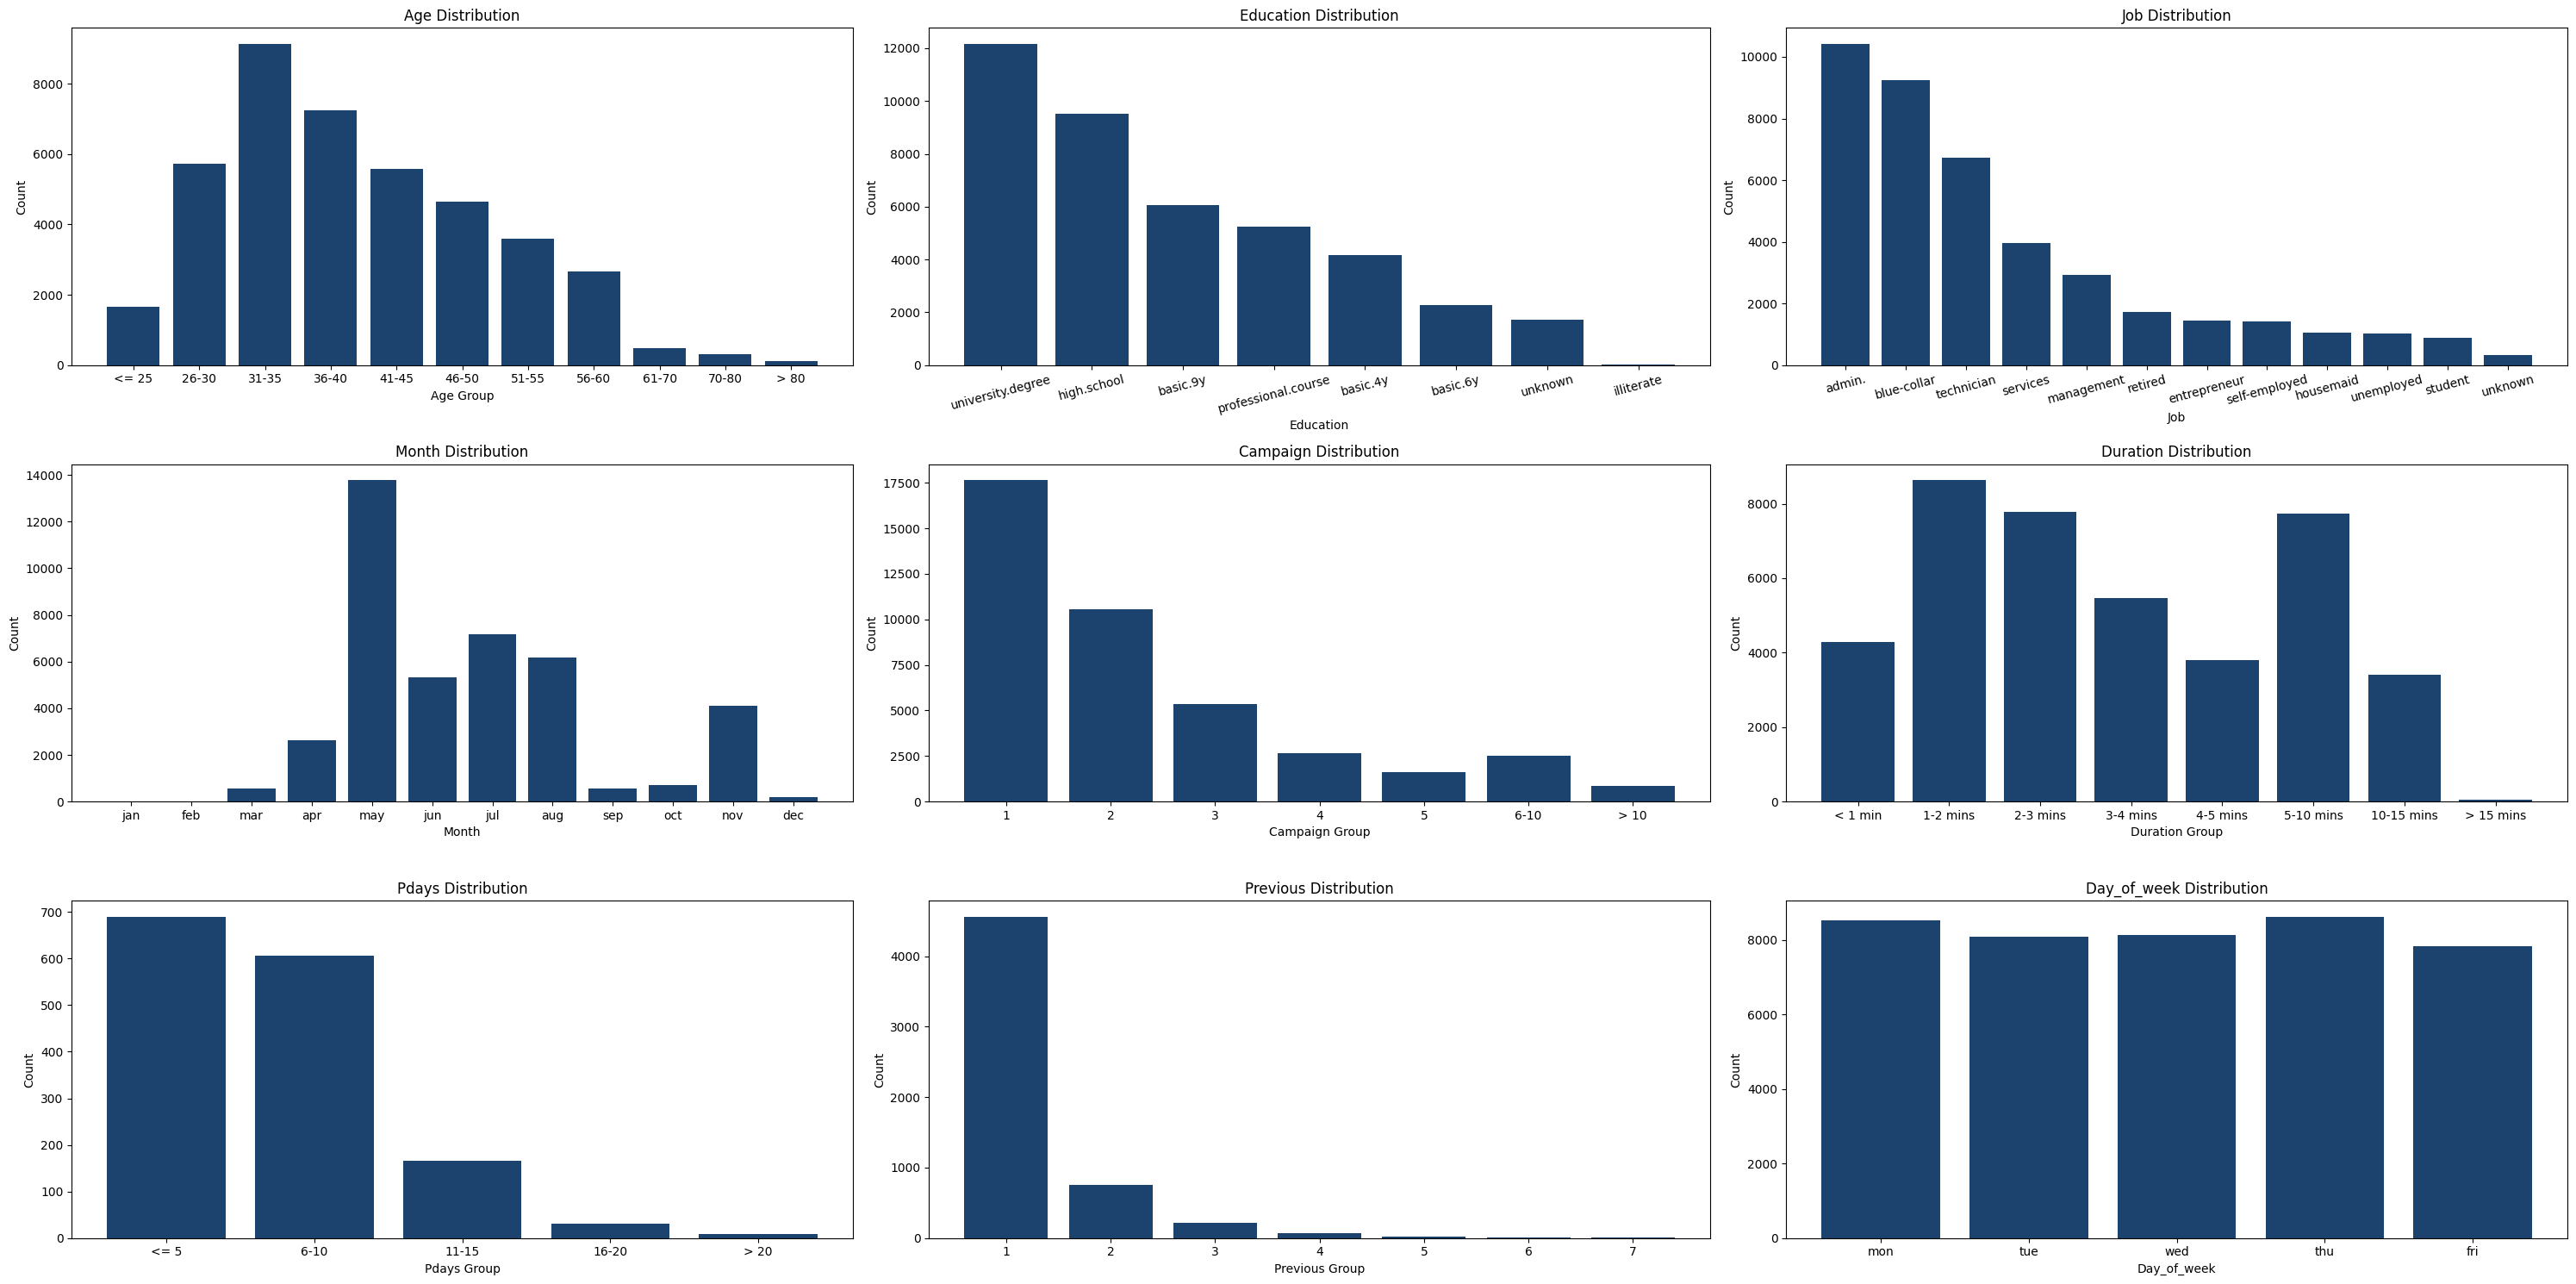

In [ ]:
# create categories named by data that needed to group to many bins
cate1 = {'age' : {
          'bins':[0, 25, 30, 35, 40, 45, 50, 55, 60, 70, 80, float('inf')],
          'labels':['<= 25', '26-30', '31-35', '36-40', '41-45', '46-50', '51-55', '56-60', '61-70', '70-80', '> 80']
         },
         'duration': {
          'bins':[0, 60, 120, 180, 240, 300, 600, 2000, float('inf')],
          'labels':['< 1 min', '1-2 mins', '2-3 mins', '3-4 mins', '4-5 mins', '5-10 mins', '10-15 mins', '> 15 mins']
         },
         'pdays' : {
          'bins':[0, 5, 10, 15, 20, 500],
          'labels':['<= 5', '6-10', '11-15', '16-20', '> 20']
         },
         'campaign' : {
          'bins':[0, 1, 2, 3, 4, 5, 10, float('inf')],
          'labels': ['1', '2', '3', '4', '5', '6-10', '> 10']
         },
         'previous' : {
          'bins':[0, 1, 2, 3, 4, 5, 6, 7],
          'labels':['1', '2', '3', '4', '5', '6', '7']
         }}
# create remaning categories
cate2 = ['job', 'education', 'month', 'day_of_week']

order_of_graph = ['age', 'education', 'job', 'month', 'campaign', 'duration', 'pdays', 'previous', 'day_of_week']
position = {}
for i, attr in enumerate(order_of_graph, 1):
  position[attr] = i

# setting for figure
plt.figure(figsize=(30, 15))
# setting figure grid
plt.subplots_adjust(top=1.25, bottom=1.2)


# plot cate1
# cate1.keys() = ['age', 'duration', 'pdays']
for attr in cate1.keys():
    # plot the chart at position
    plt.subplot(3, 3, position[attr])
    # check pd.cut for more comprehension
    # cate1[attr] => the child dictionary, cate1[attr]['bins'] => the value of key bins
    data_group = pd.cut(x=data[attr], bins=cate1[attr]['bins'], labels=cate1[attr]['labels'], right=True).reset_index()
    # group by attr
    data_job = data_group.groupby([attr]).size().reset_index(name='count')
    # plot chart
    plt.bar(x=data_job[attr], height=data_job['count'], color='#1B436E')
    plt.title(f'{attr.capitalize()} Distribution')
    plt.xlabel(f'{attr.capitalize()} Group')
    plt.ylabel('Count')

# plot cate2
for attr in cate2:
    # start at position 4
    plt.subplot(3, 3, position[attr])
    if attr == 'job' or attr == 'education':
      data_job = data.groupby([attr]).size().reset_index(name='count').sort_values(by='count',ascending=False)
    else:
      temp_df = data.copy()
      order = {'month':['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec'],
               'day_of_week':['mon', 'tue', 'wed', 'thu', 'fri'],
               'education':['unknown', 'illiterate', 'basic.4y', 'basic.6y', 'basic.9y', 'high.school', 'university.degree', 'professional.course' ]}
      temp_df[attr] = pd.Categorical(temp_df[attr], categories=order[attr], ordered=True)
      data_job = temp_df.groupby([attr]).size().reset_index(name='count')
    plt.bar(x=data_job[attr], height=data_job['count'], color='#1B436E')
    plt.title(f'{attr.capitalize()} Distribution')
    plt.xlabel(f'{attr.capitalize()}')
    plt.ylabel('Count')
    if attr == 'job' or attr == 'education':
      plt.xticks(rotation=15)

# setting for layout
plt.tight_layout()

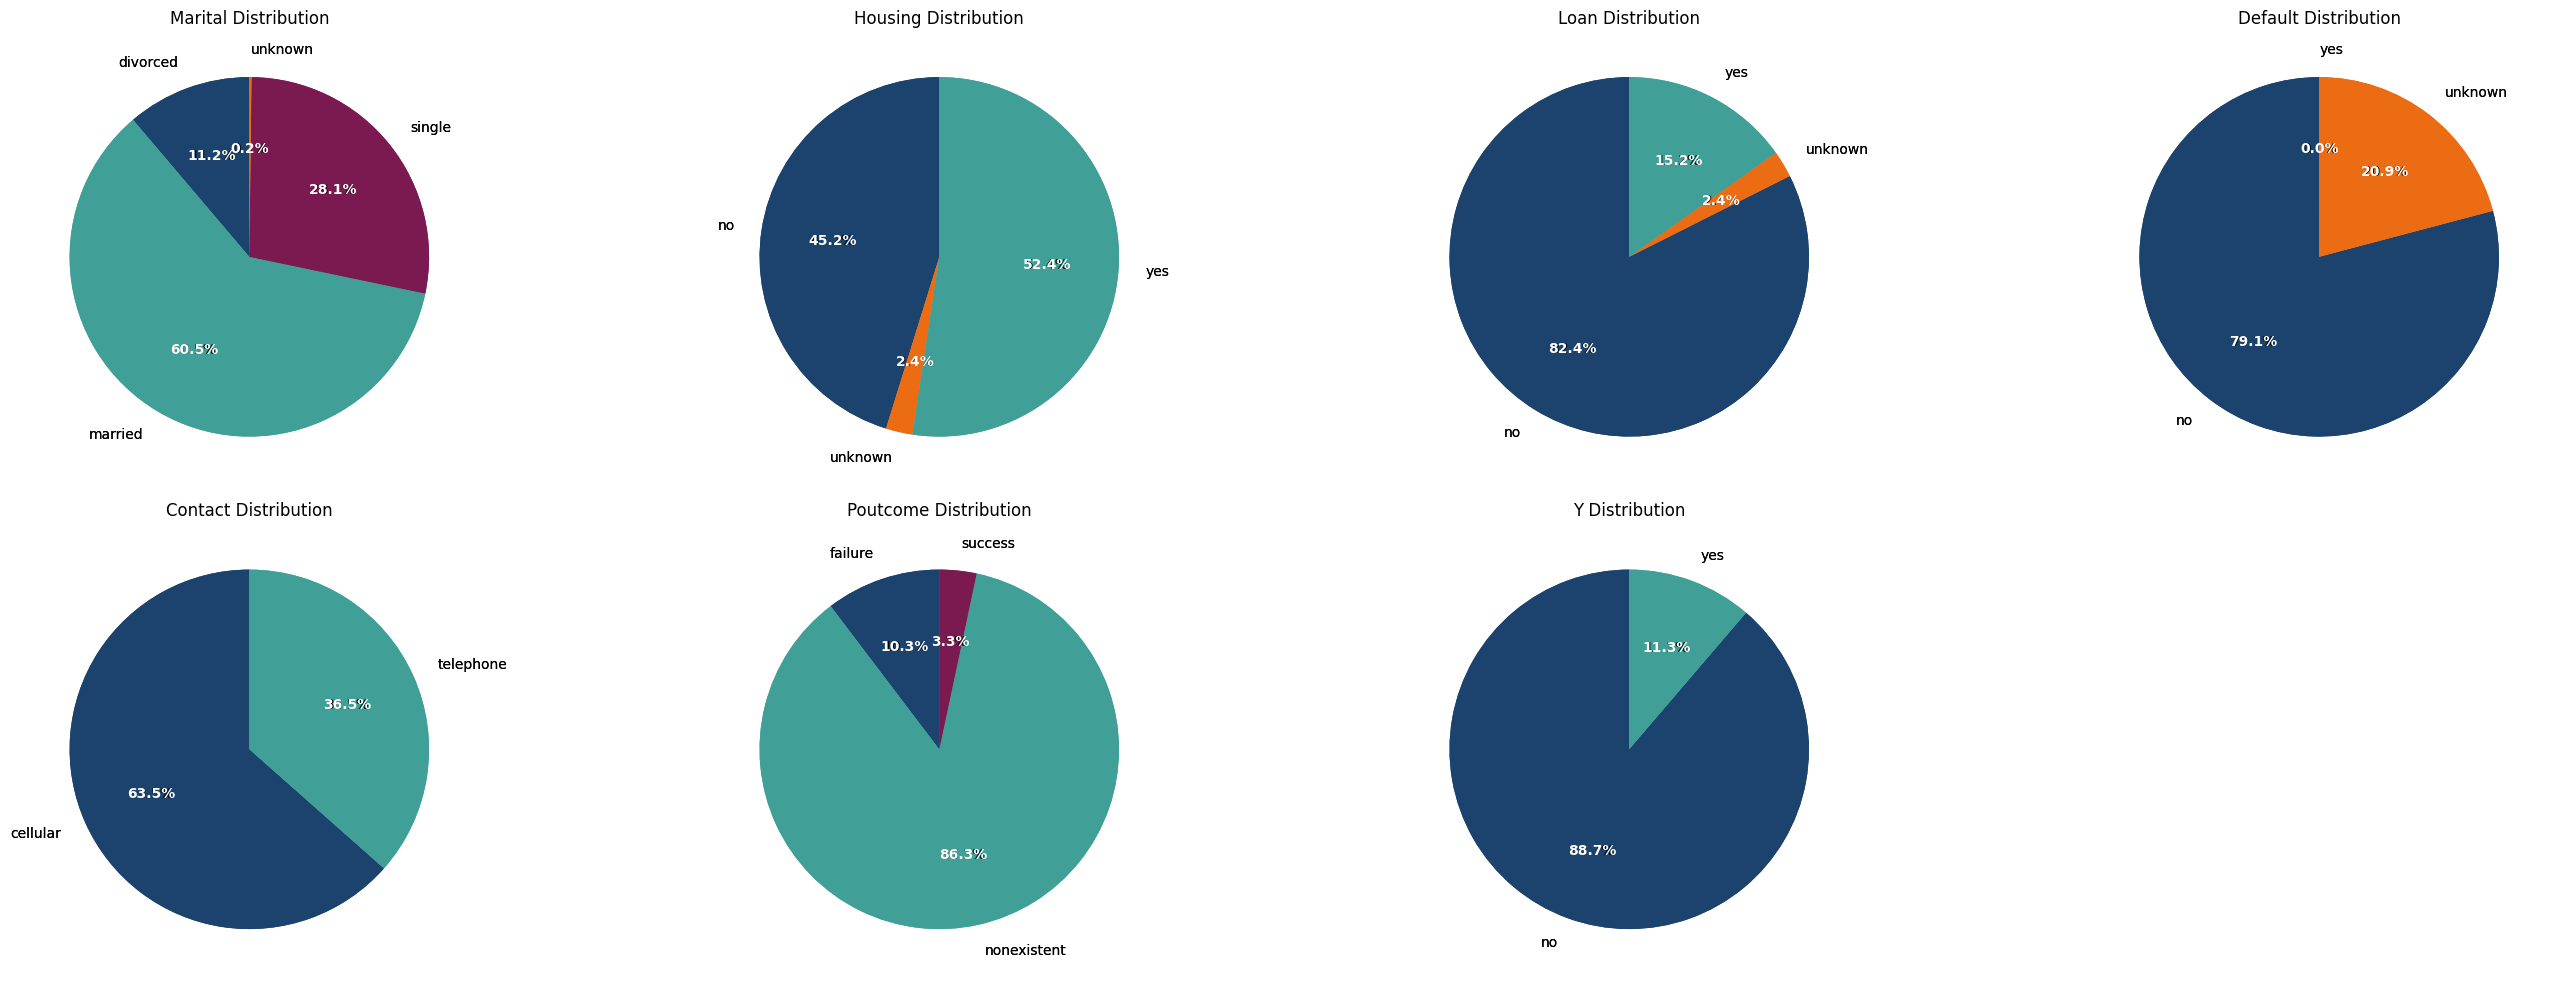

In [ ]:
cate = ['marital', 'housing', 'loan', 'default', 'contact', 'poutcome', 'y']
plt.figure(figsize=(30, 10))
plt.subplots_adjust(top=1.25, bottom=1.2)
# colors = ['#246083', '#E17228', '#296A22', '#359ED7']
# colors = ['#153A4F','#FFA500', '#1B5A7A']
colors = ['#1B436E', '#40A098', '#7B1A50', ]

for i, attr in enumerate(cate, 1):
    plt.subplot(2, 4, i)
    # group data by attr then count
    data_job = data.groupby([attr]).size().reset_index(name='count')
    # change color
    colors = ['#1B436E', '#40A098', '#7B1A50', '#EC6C14']
    if 'unknown' in data_job[attr].values.tolist():
      idx = data_job[attr].values.tolist().index('unknown')
      colors_chart = colors[:idx] + ['#EC6C14'] + colors[idx:]
    else:
      colors_chart = colors
    # plot data
    plt.pie(data_job['count'], labels=data_job[attr], autopct='%1.1f%%',
          pctdistance=0.6, labeldistance=1.15, startangle=90, colors = colors_chart)
          # textprops={'color': 'white', 'fontweight': 'bold'})
    # change color autotexts (return: patches, texts, autotexts)
    _, _, autotexts =  plt.pie(data_job['count'], labels=data_job[attr], autopct='%1.1f%%',
          pctdistance=0.6, labeldistance=1.15, startangle=90, colors = colors_chart)
    for autotext in autotexts:
      autotext.set_color('white')
      autotext.set_fontweight('bold')

    plt.title(f"{attr.capitalize()} Distribution")

plt.tight_layout()


In [ ]:
# cate = ['cons.conf.idx', 'cons.price.idx', 'nr.employed', 'emp.var.rate', 'euribor3m']

# plt.figure(figsize=(15, 7))

# for (i, attr) in enumerate(cate, 1):
#     plt.subplot(2, 3, i)
#     data[attr].hist(bins=50, color='#1B436E')
#     plt.title(f'{attr.capitalize()} Distribution')
#     plt.xlabel(f'{attr.capitalize()}')
#     plt.ylabel('Count')
#     plt.grid(False)

# plt.tight_layout()

### 2.3.Summary

**CURRENT CAMPAIGN'S CLIENTS:**

1.   Age: 26 - 45
2.   Education: University's degree or high school
3.   Job: Admin or Blue-collar, technician
1.   Marital: Married
2.   Housing: Yes
3.   Loan: No
**CURRENT CAMPAIGN'S APPROACH:**

1.   Time: May
2.   Number of contact made: 1 - 2
3.   Duration: 1 - 3 mins or 5 - 10 mins
4.   Time interval from last call: 0 - 10 days
5.   Contact: Cellular
2.   Outcome: Mostly No but success increased 8%

note: From the above distribution we can be sure that the data is imbalanced, as the number of "no"s are also 8 times the number of "yes"


## 3.Dealing with missing data, messy data

### 3.1.Dealing with unknown values

In [ ]:
# Count rows that include 'unknown'
print('Data shape:', data.shape)
print("Total rows that include 'unknown'", (data == 'unknown').any(axis=1).sum())
print("Total 'unknown' in each column:")
(data[data.columns.tolist()] == 'unknown').sum()

Data shape: (41176, 21)
Total rows that include 'unknown' 10698
Total 'unknown' in each column:


age                  0
job                330
marital             80
education         1730
default           8596
housing            990
loan               990
contact              0
month                0
day_of_week          0
duration             0
campaign             0
pdays                0
previous             0
poutcome             0
emp.var.rate         0
cons.price.idx       0
cons.conf.idx        0
euribor3m            0
nr.employed          0
y                    0
dtype: int64

Các biến có giá trị không xác định là: 'education', 'job', 'housing', 'loan', 'default', 'marital'. Tuy nhiên, các biến có nhiều giá trị unknown nhất là 'education', 'job', 'housing', 'loan'. Tỷ lệ giá trị ‘unknown' ở biến ‘marital’rất thấp (0,2%) và tỉ lệ giá trị ‘unknown’ đối với biến 'default' có thể cho rằng biến default (là việc không thực hiện các khoản thanh toán cần thiết trên khoản nợ) là không xác định bởi vì có thể khách hàng không sẵn sàng tiết lộ thông tin của mình qua điện thoại.

Để xử lý dữ liệu bị thiếu trong tập dữ liệu, tránh sử dụng việc loại bỏ các hàng vì điều đó sẽ làm giảm số lượng dữ liệu và có thể ảnh hưởng đến độ chính xác của xây dựng mô hình. Thay vào đó, có thể sử dụng phương pháp suy luận các giá trị còn thiếu dựa trên các biến khác. Mặc dù không phải mọi giá trị còn thiếu đều được điền nhưng hầu hết nó sẽ có giá trị hợp lý có thể hữu ích trong việc xây dựng mô hình.


#### 3.1.1.Find pattern in missing data

In [ ]:
column_pairs = [('job', 'loan'), ('job', 'housing'), ('education', 'loan'),
                ('education', 'housing'), ('loan', 'housing')
                ]

# Loop through column pairs and create crosstabs
for (row_col, col_col) in column_pairs:
    title = f"Cross-tabulation:\033[1m {row_col} vs {col_col}\033[0m"  # \033[1m for bold, \033[0m for reset
    cross_tab = pd.crosstab(data[row_col], data[col_col]).reset_index().sort_values(by='unknown', ascending=False) # sorted by unknown
    print(title)
    # print(cross_tab)
    print(cross_tab)
    print()

title = f"Cross-tabulation:\033[1m job vs education\033[0m"
print(title)
pd.crosstab(data['job'], data['education']).sort_values(by='unknown', ascending=False)


Cross-tabulation: job vs loan
loan            job    no  unknown   yes
1       blue-collar  7647      240  1366
0            admin.  8482      227  1710
9        technician  5603      147   989
7          services  3265      101   601
4        management  2414       71   439
5           retired  1434       44   240
6     self-employed  1186       40   195
2      entrepreneur  1214       36   206
3         housemaid   877       29   154
10       unemployed   838       27   149
8           student   710       23   142
11          unknown   268        5    57

Cross-tabulation: job vs housing
housing            job    no  unknown   yes
1          blue-collar  4303      240  4710
0               admin.  4634      227  5558
9           technician  2979      147  3613
7             services  1817      101  2049
4           management  1363       71  1490
5              retired   782       44   892
6        self-employed   641       40   740
2         entrepreneur   641       36   779
3      

education,basic.4y,basic.6y,basic.9y,high.school,illiterate,professional.course,university.degree,unknown
job,,,,,,,,
blue-collar,2318,1425,3623,878,8,453,94,454
admin.,77,151,499,3329,1,363,5750,249
technician,58,87,384,872,0,3317,1809,212
student,26,13,99,357,0,43,170,167
services,132,226,388,2680,0,218,173,150
unknown,52,22,31,37,0,12,45,131
management,100,85,166,298,0,89,2063,123
retired,597,75,145,276,3,241,284,97
entrepreneur,137,71,210,234,2,135,610,57


**Suy luận trình độ học vấn từ công việc**: Từ bảng đối chiếu có thể thấy những người làm công việc quản lý thường có bằng đại học. Do đó, bất cứ khi nào 'job' = admin và 'education' = unknown, chúng ta có thể thay thế 'education' bằng 'university.degree'. Tương tự, 'job' = 'services' --> 'education' = 'high.school' và 'job' = 'housemaid' --> 'education' = 'basic.4y'.

**Suy luận công việc từ giáo dục**: Nếu 'education' = 'basic.4y' hoặc 'basic.6y' hoặc 'basic.9y' thì 'job' thường là 'blue-collar'. Nếu 'education' = 'professional.course' thì 'job' = 'technician'.

**Suy luận công việc theo độ tuổi**: Như chúng ta thấy, nếu 'age' > 60 thì 'job' là 'retired'.


#### 3.1.2.Data Imputation

In [ ]:
# Replace unknown value in column 'job'
# 'age'>60 -> 'job'='retired'
data.loc[(data['age'] > 60) & (data['job'] == 'unknown'), 'job'] = 'retired'

# 'education'='basic.4y' or 'basic.6y' or 'basic.9y' -> 'job' = 'blue-collar'. 'education' = 'professional.course' -> 'job' = 'technician'
data.loc[((data['education'] == 'basic.4y') | (data['education'] == 'basic.6y') | (data['education'] == 'basic.9y')) & (data['job'] == 'unknown'), 'job'] = 'blue-collar'
data.loc[(data['education'] == 'professional.course') & (data['job'] == 'unknown'), 'job'] = 'technician'


# Replace unknown value in column 'education'
# 'job' = management -> 'education' = 'university.degree'. 'job' = 'services' -> 'education' = 'high.school'. 'job' = 'housemaid' -> 'education' = 'basic.4y'
data.loc[(data['education'] == 'unknown') & (data['job'] == 'management'), 'education'] = 'university.degree'
data.loc[(data['education'] == 'unknown') & (data['job'] == 'services'), 'education'] = 'high.school'
data.loc[(data['education'] == 'unknown') & (data['job'] == 'housemaid'), 'education'] = 'basic.4y'

In [ ]:
jobs = data['job'].unique().tolist()
jobs.remove('unknown')
house = ['no','yes']

for j in jobs:
    i = data[np.logical_and(np.array(data['housing']=='unknown'),np.array(data['job']==j))].index
    mask=np.random.rand(len(i))<((jobhousing.loc[j]['no'])/(jobhousing.loc[j]['no']+jobhousing.loc[j]['yes']))
    ind1=ind[mask]
    ind2=ind[~mask]
    df.loc[ind1,"housing"]='no'
    df.loc[ind2,"housing"]='yes'


##4.Bivariate/Multivariate Analysis

**We can consider some following questions:**

1.   What is the target customers of this campaign?


2.   What is the potential approach of the campaign?


3. How the economy affect clients' decision?






###4.1.What is the target/ potential customers of this campaign?

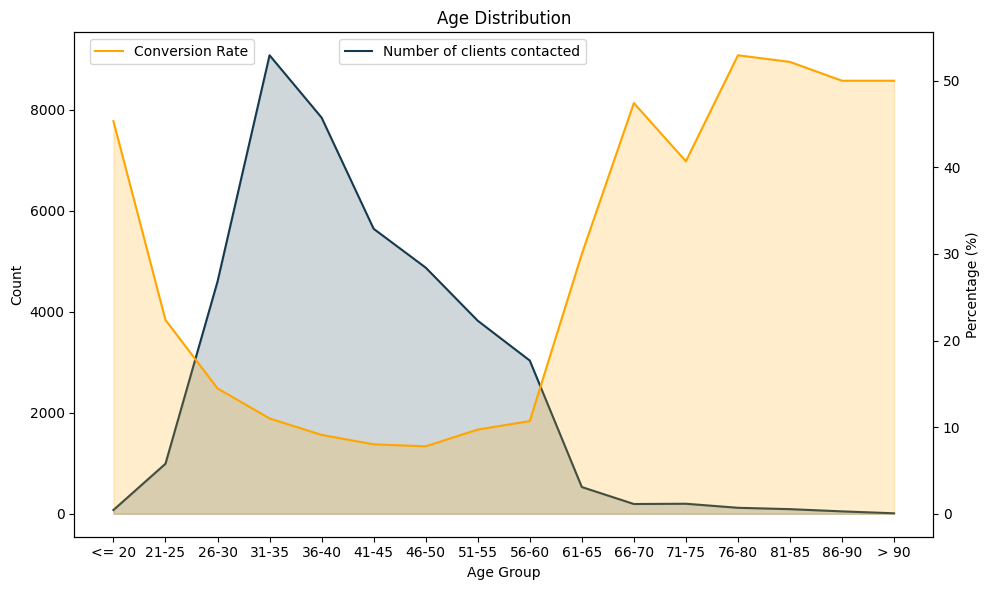

In [ ]:
data_target = data[['age', 'y']].groupby(['age', 'y']).size().reset_index(name='count')
data_target_pivot = data_target.pivot(index='age', columns='y', values='count').fillna(0)
data_target_pivot['total'] = data_target_pivot['yes'] + data_target_pivot['no']
data_target_pivot['percent_yes'] = (data_target_pivot['yes'] / data_target_pivot['total']) * 100

bins = [0, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, float('inf')]
labels = ['<= 20', '21-25', '26-30', '31-35', '36-40', '41-45', '46-50', '51-55', '56-60', '61-65', '66-70', '71-75', '76-80', '> 80']

data_target_pivot['age_group'] = pd.cut(data_target_pivot.index, bins=bins, labels=labels, right=False)
data_target_pivot = data_target_pivot.groupby('age_group').sum()
data_target_pivot['percent_yes'] = (data_target_pivot['yes'] / data_target_pivot['total']) * 100
data_target_pivot.reset_index(inplace=True)

# plot
fig, ax1 = plt.subplots(figsize=(10, 6))
ax1.plot(data_target_pivot.age_group, data_target_pivot['total'], color='#153A4F')
ax1.fill_between(data_target_pivot.age_group, data_target_pivot['total'], color='#153A4F', alpha=.2)
ax1.set_ylabel('Count')
ax1.set_xlabel('Age Group')
ax1.legend(['Number of clients contacted'], loc='upper left', bbox_to_anchor=(0.3, 1), ncol=2)

ax2 = ax1.twinx()
ax2.plot(data_target_pivot.age_group, data_target_pivot['percent_yes'], color='orange')
ax2.fill_between(data_target_pivot.age_group, data_target_pivot['percent_yes'], color='orange', alpha=.2)
ax2.set_ylabel('Percentage (%)')
ax2.legend(['Conversion Rate'], loc='upper left', bbox_to_anchor=(0.01, 1), ncol=2)
plt.title("Age Distribution")
plt.tight_layout()

**Age graph**
1. Nhìn vào đường màu vàng, tỉ lệ chuyển đổi (tlcd) của nhóm người <= 25 và > 60 cao hơn nhiều so với nhóm còn lại (26 - 60), tuy nhiên, nhìn vào đường màu xanh, số lượng của nhóm người có tlcd cao là rất thấp => dễ bị bias
2. Lượng khách hàng 26-60 có tlcd khá thấp là vì dân số chỉ tập trung ở độ tuổi 26-60 => khó bị biased
* => Mở rộng, tiếp cận nhiều hơn tới phân khúc độ tuổi <= 25 và > 60 trong chiến dịch tiếp theo.
*  => Tuy nhiên, ngoài việc mở rộng phân khúc khách hàng tới 2 nhóm kia, chiến dịch tiếp theo nên cải thiện về chất lượng để nhằm tăng tlcd của phân khúc khách hàng chính (26-60)

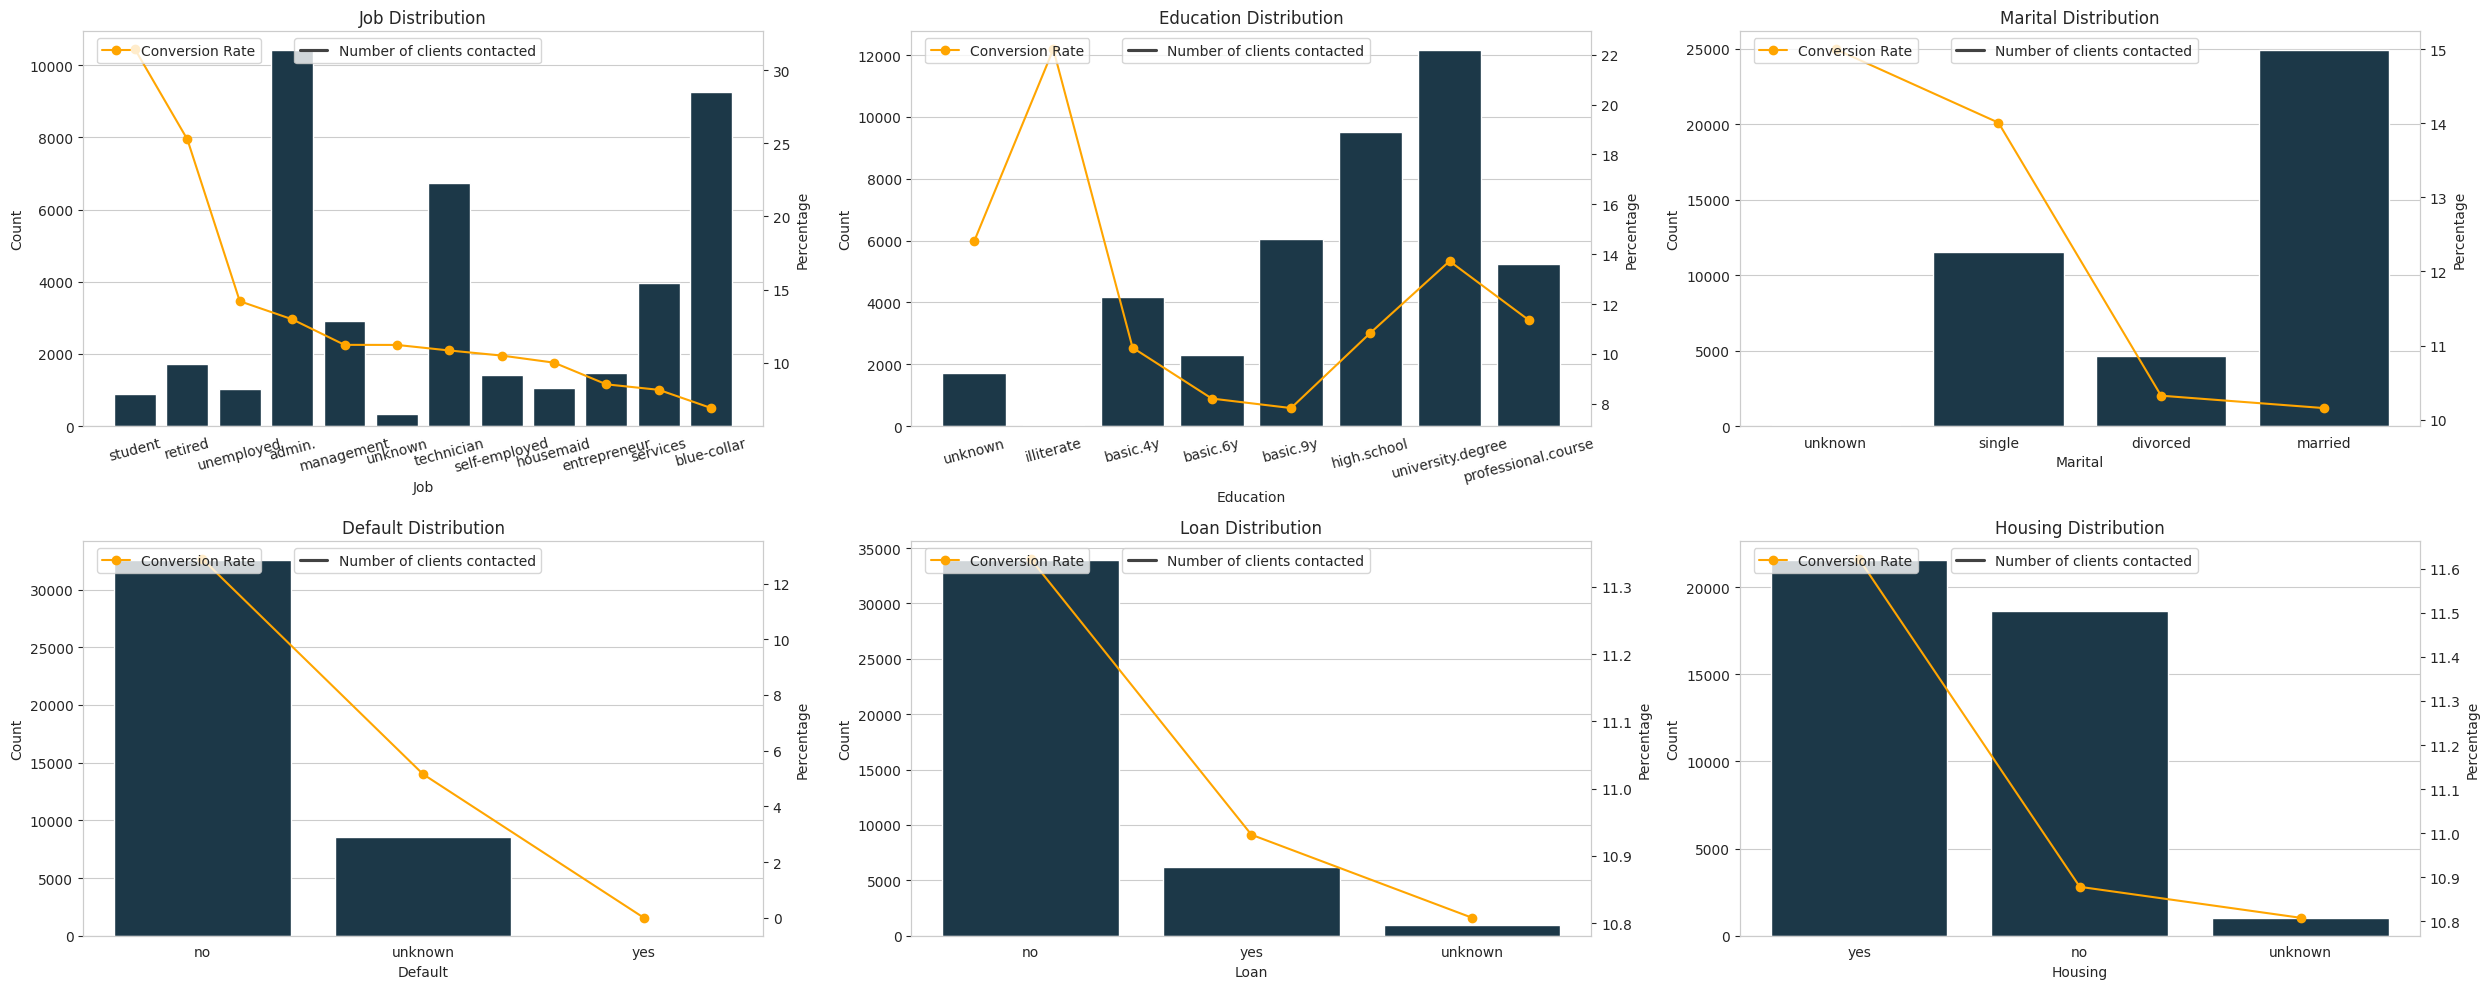

In [ ]:
cate2 = ['job', 'education', 'marital', 'default', 'loan', 'housing']

# setting for figure
plt.figure(figsize=(25, 10))

# setting figure grid
plt.subplots_adjust(top=1.25, bottom=0.1, hspace=0.5, wspace=0.3)
sns.set_style('whitegrid')

# Plot cate2
for i, attr in enumerate(cate2, 1):
    # Start at position 1
    plt.subplot(2, 3, i)

    # Process data
    data_target = data[[attr, 'y']].groupby([attr, 'y']).size().reset_index(name='count')
    data_target_pivot = data_target.pivot(index=attr, columns='y', values='count').fillna(0)
    data_target_pivot['total'] = data_target_pivot['yes'] + data_target_pivot['no']
    data_target_pivot['percent_yes'] = (data_target_pivot['yes'] / data_target_pivot['total']) * 100
    data_target_pivot = data_target_pivot.sort_values(by='percent_yes', ascending=False)
    data_target_pivot.reset_index(inplace=True)
    if attr == 'education':
        order = ['unknown', 'illiterate', 'basic.4y', 'basic.6y', 'basic.9y', 'high.school', 'university.degree', 'professional.course']
        data_target_pivot[attr] = pd.Categorical(data_target_pivot[attr], categories=order, ordered=True)
        data_target_pivot = data_target_pivot.sort_values(by=attr)
    # Plot twin chart
    ax1 = sns.barplot(x=data_target_pivot[attr], y='total', data=data_target_pivot, color='#153A4F')
    ax1.set_ylabel('Count')
    ax1.set_xlabel(attr.capitalize())
    ax1.legend(['Number of clients contacted'], loc='upper left', bbox_to_anchor=(0.3, 1), ncol=2)

    ax2 = ax1.twinx()
    ax2.plot(data_target_pivot[attr], data_target_pivot['percent_yes'], color='orange', marker='o')
    ax2.set_ylabel('Percentage')
    ax2.yaxis.grid(False)
    ax2.legend(['Conversion Rate'], loc='upper left', bbox_to_anchor=(0.01, 1), ncol=2)
    # Rotate x-axis labels
    if attr in ['job', 'education']:
        plt.setp(ax1.xaxis.get_majorticklabels(), rotation=15)
    # Set title
    plt.title(f'{attr.capitalize()} Distribution')

plt.tight_layout()
plt.show()

**Remaining graph**

1.   **Job**: Mặc dù tlcd của student và retired cao, nhưng số lượng là quá thấp. Mặt khác, *admin và technician* rất tiềm năng do vừa có số lượng và tlcd khá cao. Ngoài ra, *management* cũng có tlcd tương đối cao, tuy nhiên số lượng chưa được nhiều bằng 2 ngành nghề trước.
* Lý do : vì admin và technician là 2 ngành nghề có thu nhập trung bình-cao và ổn định => clients sẽ có xu hướng gửi tiết kiệm hơn.
2. **Education**: Khách hàng với tấm bằng đại học (university.degree) rất tiềm năng khi vừa chiếm số lượng lớn (> 12000) và tlcd cao(~ 14%).
* Lý do : Trình độ học vấn cao có thể liên quan đến thu nhập cao hơn và ý thức tài chính tốt hơn.
3. **Marital**: Nhóm người *single* rất tiềm năng và có tlcd cao, tuy nhiên đây vẫn không phải là mục khách hàng chính của chiến dịch. Mặt khác, nhóm người *married*  tuy có tlcd thấp nhưng đây lại là nhóm khách hàng chính.
* Lý do : Người độc thân có thể không phải xem xét ý kiến của người khác khi quyết định tài chính cá nhân, tuy nhiên những người nhóm married chiếm đa số vì mọi người thường đã kết hôn trong độ tuổi 26-60.
4. **Default**: Có thể dễ thấy rằng nhóm người không có nợ tín dụng chiếm số lượng và tlcd lớn nhất .
* Lý do có thể đơn giản là vì nhóm người này sẽ có tình hình tài chính ổn định, không gặp vấn đề nợ nần.
5. **Loan**: Tương tự với Default.
6. **Housing**: Trái ngược với 2 cái trên, những người có khoản vay mua nhà lại chiếm số lượng lớn và tlcd cao nhất.
* Lý do có thể là bởi việc phải trả tiền hàng tháng tạo áp lực tài chính, đặt ưu tiên cao cho việc tìm kiếm cơ hội đầu tư hoặc tiết kiệm tiền. Điều này khuyến khích người có nợ housing tìm kiếm các sản phẩm tài chính như term deposit.


**Tổng kết**
1.   **Age**: 26 - 60
2.   **Job**: Admin, technician
3.   **Education**: University.degree
4.   **Marital**: Married
5.   **Default**: No
6.   **Loan**: No
7.   **Housing**: Yes

- Đây là những đặc điểm của target customer mà chiến dịch tiếp theo nên nhắm tới và cải thiện để tăng tlcd.
- Tuy nhiên vẫn nên mở rộng tệp khách hàng có thể tiềm năng khác ví dụ như độ tuổi < 25 và > 60, hoặc ngành nghề management
---
**Một số gợi ý cho sự cải tiến của chiến dịch:**
1. Age:
* Đối với nhóm 26-60: Tạo mới nội dung tiếp thị chuyên sâu về các sản phẩm tài chính và lợi ích của việc tiết kiệm hoặc đầu tư dài hạn - **(cải thiện chất lượng)**
* Đối với nhóm <= 25: Sử dụng nền tảng truyền thông xã hội và kênh trực tuyến để tiếp cận và tương tác với nhóm này - **(cải thiện số lượng)**
2. Job:
- Tạo các chương trình tiết kiệm hoặc đầu tư phù hợp với thu nhập của admin và technician - **(cải thiện chất lượng)**
- Tiếp cận nhiều hơn tới nhóm management - **(cải thiện số lượng)**
3. Education:
- Tạo các chương trình hoặc gói sản phẩm dành riêng cho những người có trình độ đại học, ví dụ như lãi suất ưu đãi cho term deposit - **(cải thiện chất lượng)**
4. Married Individuals:
- Tạo các chương trình hoặc gói sản phẩm dành riêng cho những người đã kết hôn, có thể bao gồm các tùy chọn quản lý tài chính hợp nhất cho cả gia đình - **(cải thiện chất lượng)**
5. Default and loan (những người không có nợ):
- Tạo nội dung tiếp thị đặc biệt về sự ổn định tài chính và lợi ích của việc quản lý tài chính cá nhân - **(cải thiện chất lượng)**
6. Housing:
- Cung cấp các giải pháp tài chính linh hoạt để giúp họ quản lý tốt hơn các khoản vay và chi phí liên quan - **(cải thiện chất lượng)**


###4.2.What is the potential approach of the campaign?

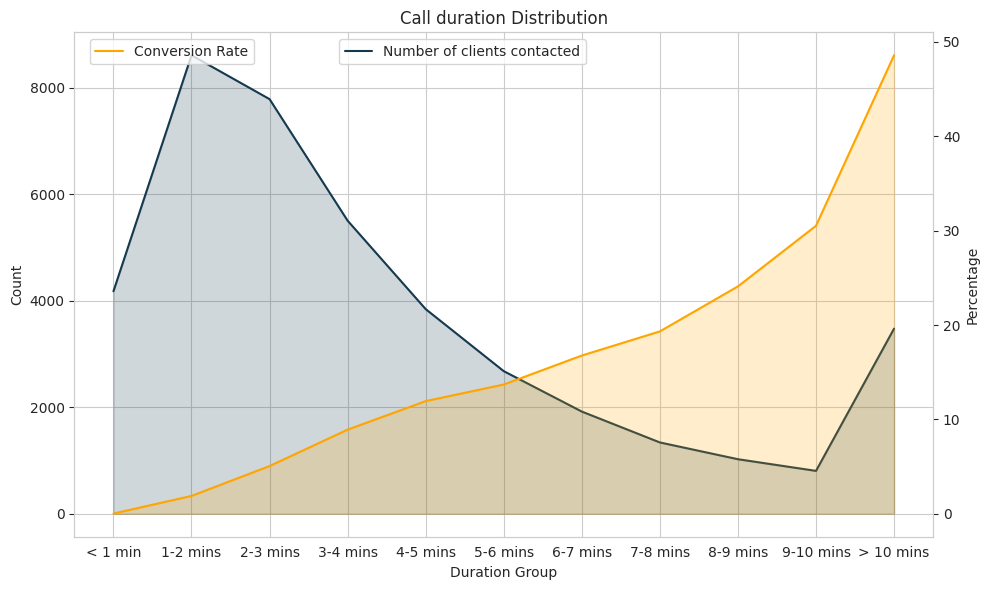

In [ ]:
data_target = data[['duration', 'y']].groupby(['duration', 'y']).size().reset_index(name='count')
data_target_pivot = data_target.pivot(index='duration', columns='y', values='count').fillna(0)
data_target_pivot['total'] = data_target_pivot['yes'] + data_target_pivot['no']
data_target_pivot['percent_yes'] = (data_target_pivot['yes'] / data_target_pivot['total']) * 100

bins = [0, 60, 120, 180, 240, 300, 360, 420, 480, 540, 600, float('inf')]
labels = ['< 1 min', '1-2 mins', '2-3 mins', '3-4 mins', '4-5 mins', '5-6 mins', '6-7 mins', '7-8 mins', '8-9 mins', '9-10 mins', '> 10 mins']

data_target_pivot['duration_group'] = pd.cut(data_target_pivot.index, bins=bins, labels=labels, right=False)
data_target_pivot = data_target_pivot.groupby('duration_group').sum()
data_target_pivot['percent_yes'] = (data_target_pivot['yes'] / data_target_pivot['total']) * 100
data_target_pivot.reset_index(inplace=True)
# # plot
fig, ax1 = plt.subplots(figsize=(10, 6))
ax1.plot(data_target_pivot.duration_group, data_target_pivot['total'], color='#153A4F')
ax1.fill_between(data_target_pivot.duration_group, data_target_pivot['total'], color='#153A4F', alpha=.2)
ax1.set_ylabel('Count')
ax1.set_xlabel('Duration Group')
ax1.legend(['Number of clients contacted'], loc='upper left', bbox_to_anchor=(0.3, 1), ncol=2)

ax2 = ax1.twinx()
ax2.plot(data_target_pivot.duration_group, data_target_pivot['percent_yes'], color='orange')
ax2.fill_between(data_target_pivot.duration_group, data_target_pivot['percent_yes'], color='orange', alpha=.2)
ax2.set_ylabel('Percentage')
ax2.legend(['Conversion Rate'], loc='upper left', bbox_to_anchor=(0.01, 1), ncol=2)
ax2.yaxis.grid(False)
plt.title('Call duration Distribution')
plt.tight_layout()

**Duration Graph**

Độ dài cuộc gọi tỉ lệ thuận với tlcd, điều này có nghĩa rằng nó ảnh hưởng rất lớn tới quyết định của người mua hàng

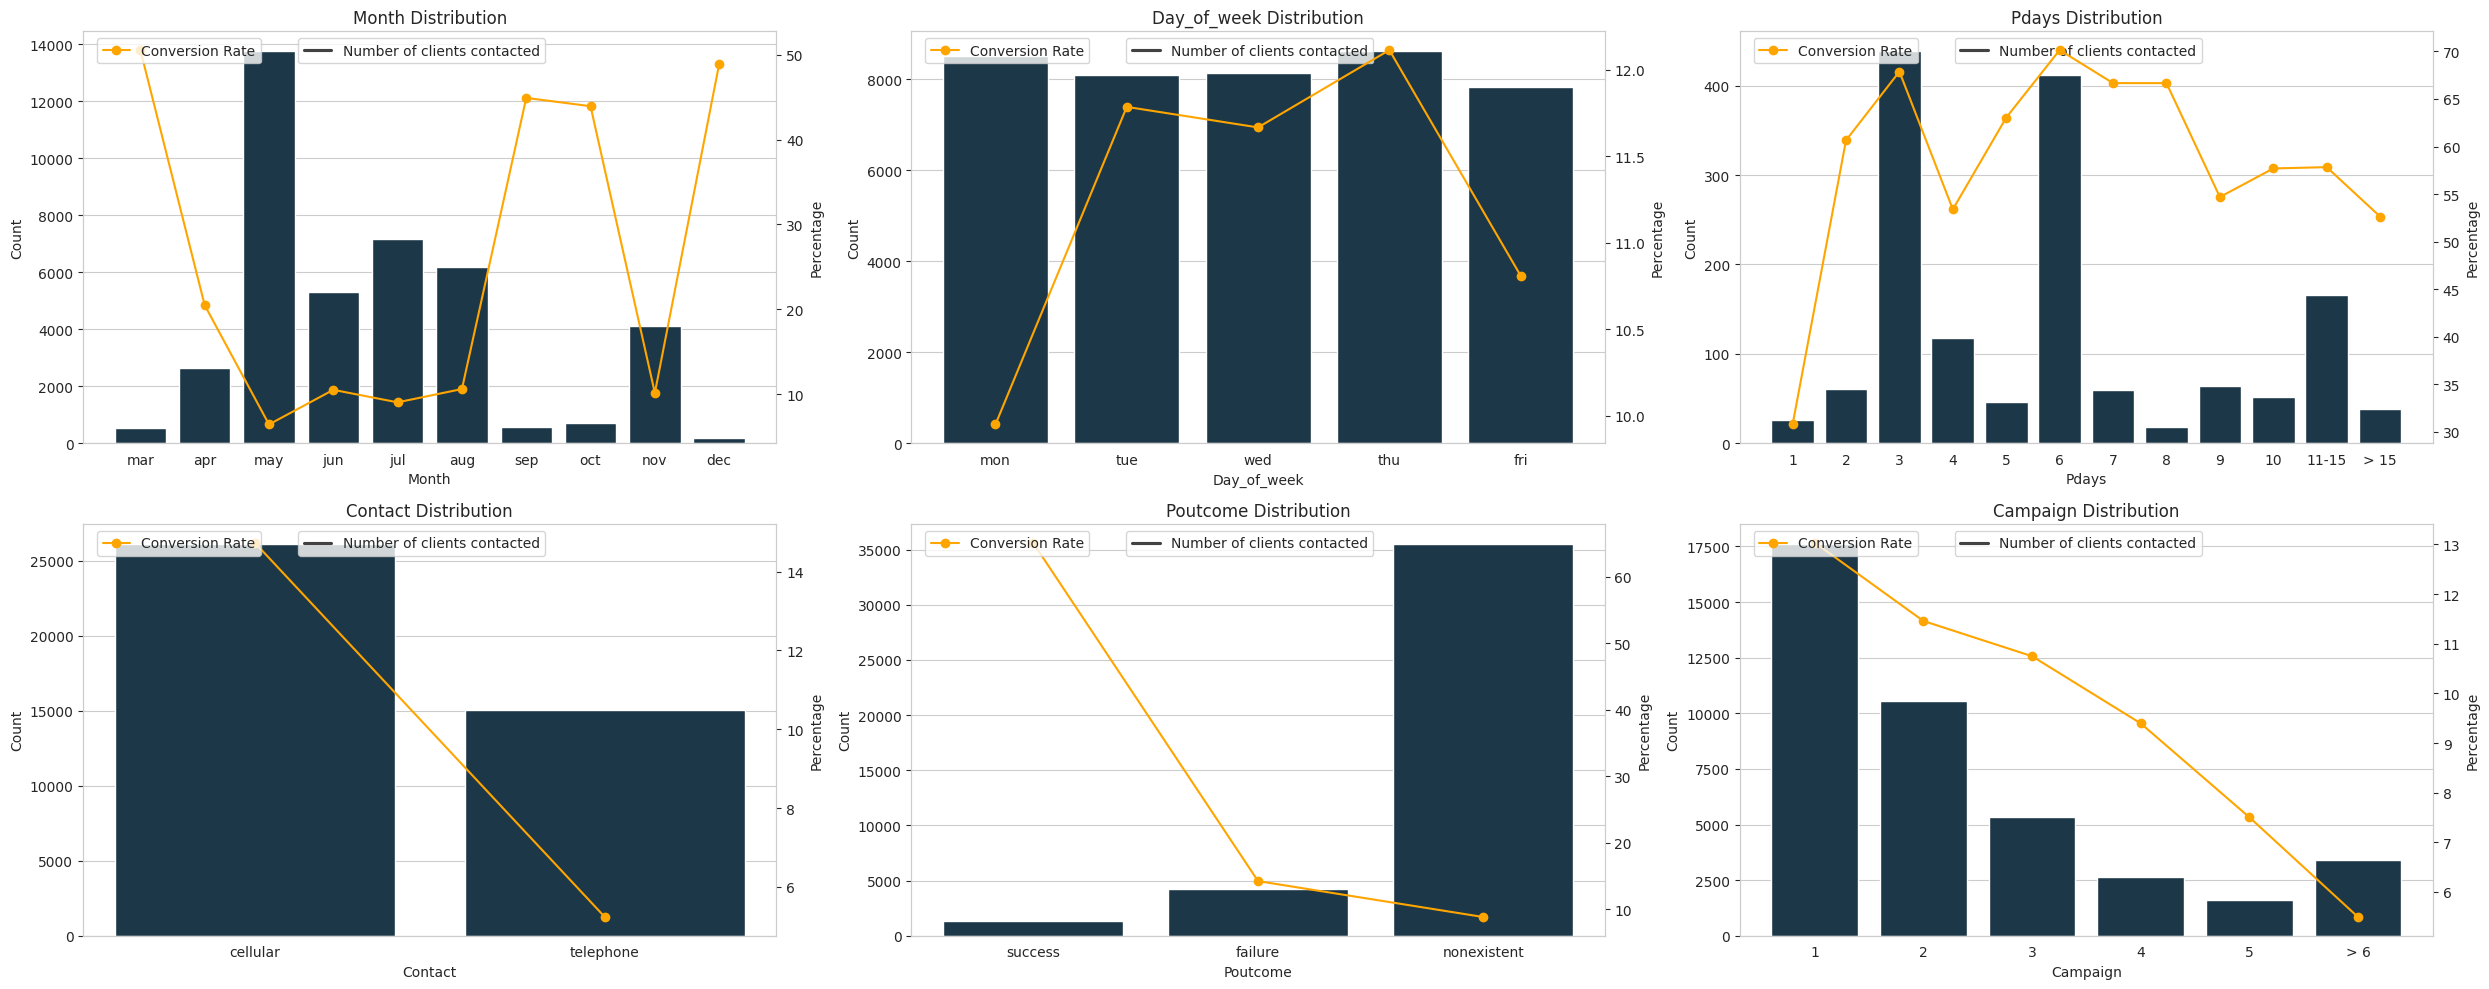

In [ ]:
cate2 = ['month', 'day_of_week', 'pdays', 'contact', 'poutcome', 'campaign']

# setting for figure
plt.figure(figsize=(25, 10))
# setting figure grid
plt.subplots_adjust(top=1.25, bottom=0.1, hspace=0.5, wspace=0.3)
sns.set_style('whitegrid')

# Plot cate2
for i, attr in enumerate(cate2, 1):
  # Start at position 1
  plt.subplot(2, 3, i)

  # Process data
  data_target = data[[attr, 'y']].groupby([attr, 'y']).size().reset_index(name='count')
  data_target_pivot = data_target.pivot(index=attr, columns='y', values='count').fillna(0)
  data_target_pivot['total'] = data_target_pivot['yes'] + data_target_pivot['no']
  data_target_pivot['percent_yes'] = (data_target_pivot['yes'] / data_target_pivot['total']) * 100
  data_target_pivot = data_target_pivot.sort_values(by='percent_yes', ascending=False)
  data_target_pivot.reset_index(inplace=True)

  # process for data that need to be put into bins
  if attr in ['pdays', 'campaign']:
    cate = {'pdays' : {
            'bins':[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 15, 500],
            'labels':['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11-15', '> 15']},
            'campaign' : {
            'bins':[0, 1, 2, 3, 4, 5, float('inf')],
            'labels': ['1', '2', '3', '4', '5', '> 6']}}
    data_target_pivot[attr] = pd.cut(data_target_pivot[attr], bins=cate[attr]['bins'], labels=cate[attr]['labels'], right=True)
    data_target_pivot = data_target_pivot.groupby(attr).sum()
    data_target_pivot['percent_yes'] = (data_target_pivot['yes'] / data_target_pivot['total']) * 100
    data_target_pivot.reset_index(inplace=True)

  # process time-series data
  if attr in ['month', 'day_of_week', 'previous']:
      order = {'month':['mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec'],
               'day_of_week':['mon', 'tue', 'wed', 'thu', 'fri'],
               'previous':[0, 1, 2, 3, 4, 5, 6, 7],}
      data_target_pivot[attr] = pd.Categorical(data_target_pivot[attr], categories=order[attr], ordered=True)
      data_target_pivot = data_target_pivot.sort_values(by=attr)

  # Plot twin chart
  ax1 = sns.barplot(x=data_target_pivot[attr], y='total', data=data_target_pivot, color='#153A4F')
  ax1.set_ylabel('Count')
  ax1.set_xlabel(attr.capitalize())
  ax1.legend(['Number of clients contacted'], loc='upper left', bbox_to_anchor=(0.3, 1), ncol=2)

  ax2 = ax1.twinx()
  ax2.plot(data_target_pivot[attr], data_target_pivot['percent_yes'], color='orange', marker='o')
  ax2.set_ylabel('Percentage')
  ax2.yaxis.grid(False)
  ax2.legend(['Conversion Rate'], loc='upper left', bbox_to_anchor=(0.01, 1), ncol=2)

  plt.title(f'{attr.capitalize()} Distribution')


plt.tight_layout()


**Remaining Graph**
1. Month: tlcd theo tháng chưa chứa nhiều thông tin hữu ích, vì thế nên phân tích ở mục sau
2. Day_of_week: Sự phân bố của số lượng (~8000) và tlcd (10-12%) là rất đồng đều, vì thế day_of_week có vẻ không ảnh hưởng lớn tới quyết định của khách hàng và ta có thế loại nó khỏi model.

3. Pdays: Có sự tăng trưởng đột biến ở tlcd tại pdays = 3 và = 6, ngoài ra 2 nhóm này cũng chiếm số lượng lớn nhất => khách hàng có xu hướng đăng ký khi liên lạc lại với họ sau 3 hoặc 6 ngày. Có vẻ như khách hàng sẽ có cân nhắc và suy nghĩ thâu đáo hơn về việc gửi tiền tiết kiệm cho tương lai sau một khoảng thời gian phù hợp.

4. Contact: Dễ thấy rằng số lượng và tlcd của khách hàng được liên lạc bằng cellular cao gấp đôi so với telephone. CÓ vẻ là do điện thoại di động có tính tiện lợi cao hơn và tiếp cận được đến những người có tài chính cao hơn.
5. Poutcome: Tỉ lệ khách hàng cũ quay lại khá cao (~ 66%), tuy nhiên số lượng này chiếm chua tới 10% nếu so với tổng khách hàng đăng ký dịch vụ.  Vì thế chiến dịch tới cần đánh mạnh vào tếp khách hàng này vì họ rất tiềm năng nêu dịch vụ của ngân hàng thật sự tốt.

6. Campaign: Có vẻ tlcd tăng tỉ lệ nghịch với số lần được liên hệ khi những người được liên hệ 1 lần chiếm số lượng lớn nhất và có tlcd cao nhất. Điều này có thể liên quan đến việc quá nhiều lần liên hệ có thể gây ra sự quấy rối hoặc làm mất lòng hứa của khách hàng, trong khi một lần liên hệ duy nhất có thể tạo ra ấn tượng tích cực và kích thích hành động.



###4.3.How the economy affect clients' decision?

Dựa trên kiến thức về kinh tế vĩ mô, ta nói rằng, lãi gửi tiết kiếm tăng tỉ lệ nghịch với sự tăng trưởng một nền kinh tế. Nói cách khác, tỉ lệ chuyển đổi nghịch biến với sự tăng trường của nền kinh tế.

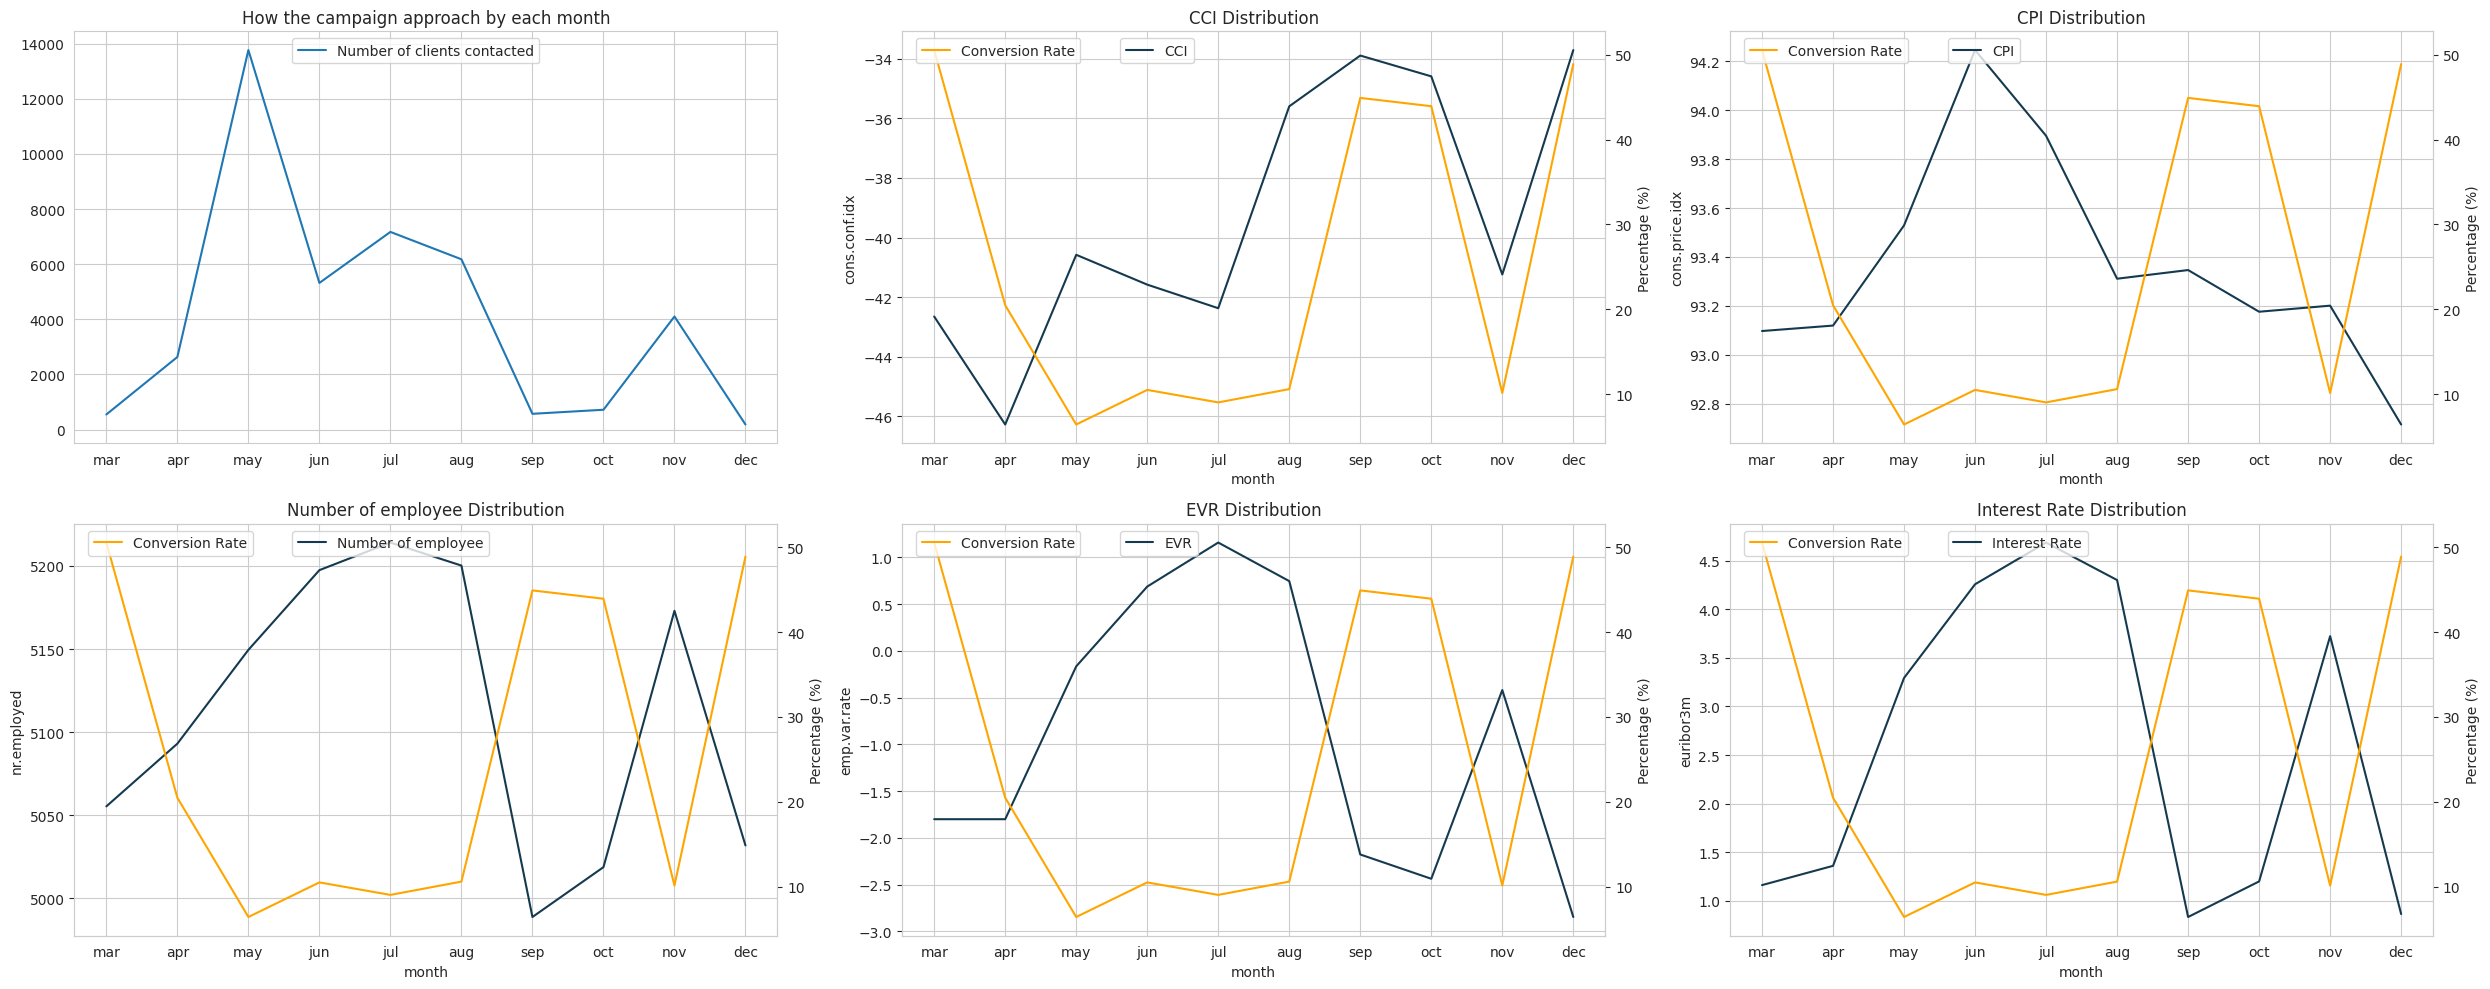

In [ ]:
cate = ['cons.conf.idx', 'cons.price.idx', 'nr.employed', 'emp.var.rate', 'euribor3m']
order = {'month':['mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec']}
name = {'emp.var.rate': 'EVR', 'cons.price.idx': 'CPI', 'cons.conf.idx': 'CCI', 'euribor3m': 'Interest Rate', 'nr.employed': 'Number of employee'}

plt.figure(figsize=(25, 10))
# setting figure grid
plt.subplots_adjust(top=1.25, bottom=0.1, hspace=0.5, wspace=0.3)

# process data for conversion rate each month
data_target = data[['month', 'y']].groupby(['month', 'y']).size().reset_index(name='count')
data_target_pivot = data_target.pivot(index='month', columns='y', values='count').fillna(0)
data_target_pivot['total'] = data_target_pivot['yes'] + data_target_pivot['no']
data_target_pivot['percent_yes'] = (data_target_pivot['yes'] / data_target_pivot['total']) * 100
data_target_pivot.reset_index(inplace=True)
data_target_pivot['month'] = pd.Categorical(data_target_pivot['month'], categories=order['month'], ordered=True)
data_target_pivot = data_target_pivot.sort_values(by='month')

for i, attr in enumerate(cate, 2):
    plt.subplot(2, 3, i)

    # process data for attr
    data_index = data[[attr, 'month']].groupby(['month']).mean()
    data_index.reset_index(inplace=True)
    data_index['month'] = pd.Categorical(data_index['month'], categories=order['month'], ordered=True)
    data_index = data_index.sort_values(by='month')

    # plot
    ax1 = sns.lineplot(x='month', y=attr, data=data_index, color='#153A4F')
    # ax1.fill_between(data_index.age_group, data_index['total'], color='#153A4F', alpha=.2)
    # ax1.set_ylabel('Count')
    # ax1.set_xlabel('Age Group')
    ax1.legend([f'{name[attr]}'], loc='upper left', bbox_to_anchor=(0.3, 1), ncol=2)

    ax2 = ax1.twinx()
    ax2.plot(data_target_pivot['month'], data_target_pivot['percent_yes'], color='orange')
    ax2.set_ylabel('Percentage (%)')
    ax2.yaxis.grid(False)

    ax2.legend(['Conversion Rate'], loc='upper left', bbox_to_anchor=(0.01, 1), ncol=2)
    plt.title(f"{name[attr]} Distribution")
plt.subplot(2, 3, 1)
plt.plot(data_target_pivot['month'], data_target_pivot['total'])
plt.title(f'How the campaign approach by each month')
plt.legend([f'Number of clients contacted'], loc='upper left', bbox_to_anchor=(0.3, 1), ncol=2)
plt.tight_layout()



Dựa trên quan sát, ta thấy chiến dịch đi ngược lại với CCI (thứ làm khách hàng có niềm tin về sự tăng trưởng của nền kinh tế), và khá tương đồng với các chỉ số còn lại (những thứ nghịch biến với sự tăng trưởng của nền kinh tế). Do đó, chiến dịch đã theo sát những gì nền kinh tế đã diễn ra và đó là một cách tiếp cận đúng.

Vì thế,  tlcd tăng có vẻ không bị ảnh hưởng bởi các chỉ số này mà là do số lượng khách hàng thấp dẫn đến bias

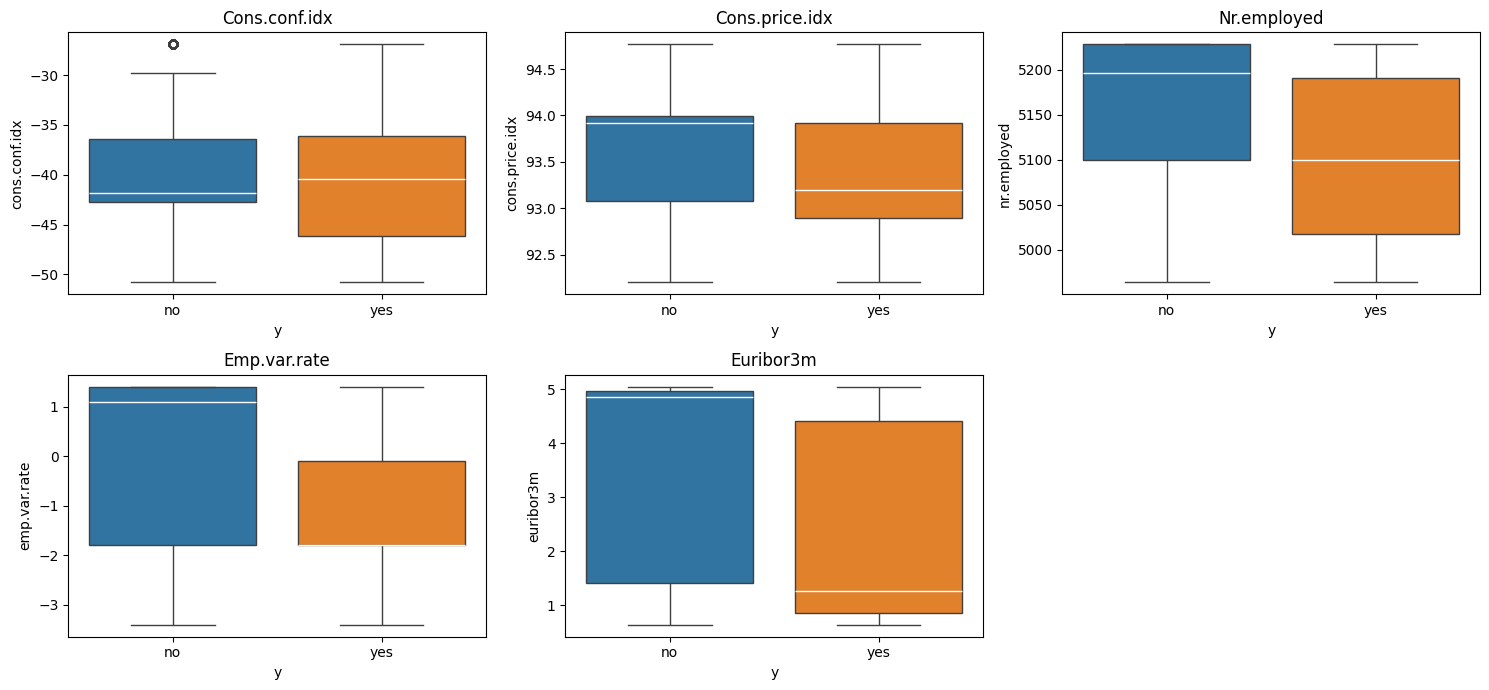

In [ ]:
cate = ['cons.conf.idx', 'cons.price.idx', 'nr.employed', 'emp.var.rate', 'euribor3m']
plt.figure(figsize=(15,7))
# setting figure grid
plt.subplots_adjust(top=1.25, bottom=0.1, hspace=0.5, wspace=0.3)

for i, attr in enumerate(cate, 1):
    plt.subplot(2,3,i)
    sns.boxplot(data=data, x='y', hue="y", y=attr, medianprops=dict(color="white", alpha=1))
    plt.title(attr.capitalize())
plt.tight_layout()



Ngoài CCI có median của số lượng No và Yes khá tương đồng (CCI không có ảnh hưởng lớn tới quyết định khách hàng), các chỉ số còn lại có sự tưởng phản khá lớn giữa 2 median, đặc biệt là euribor3m và emp.var.rate, cho thấy sự quan trọng của nó tới quyết định của khách hàng.


## 5.Model Building

**Vấn đề Machine Learning**

Đây là một loại binary classification. Biến outcome chứa 2 giá trị, yes-khách hàng đăng ký gửi tiền, và no-khách hàng không đăng ký.

**Đánh giá mô hình**

Chúng ta sử dụng phương pháp AUC

**Tại sao sử dụng AUC?**

Lý do chúng ta chọn AUC thay vì accuracy là bởi, tập dữ liệu chúng ta đang làm việc với là một tập dữ liệu mất cân đối với class "no" là lớp chiếm đa số. Nếu chúng ta sử dụng accuracy làm độ đo, bất kỳ mô hình ngẫu nhiên nào cũng có thể cho chúng ta một accuracy rất cao vì nó sử dụng cả True Negative và True Positive để tính điểm, do đó, sự áp đảo của một class có thể dẫn đến accuracy rất cao.

AUC vượt qua vấn đề này bằng cách xem xét cả True Positive Rate (TPR) và False Positive Rate (FPR). Chỉ khi cả TPR và FPR đều cao hơn đường ngẫu nhiên trong đường cong ROC, chúng ta mới có được một AUC tốt. accuracy không đảm bảo điều đó.

**Vì sao loại duration khỏi model?**

Duration tỉ lệ thuận với tlcd, tức là duration càng cao thì tỉ lệ đồng ý càng cao, do đó, duration có thể gây overfitting cho model, từ đó làm variance cao và độ chính xác không cao trong tập test.

**Vì sao loại pdays, previous, poutcome?**

3 biến này đều liên quan tới chiến dịch trước, vì thế phần lớn dữ liệu của chúng đều missing, do đó ta không dùng nó trong model vì có thể gây ra sự mất cân bằng cho model.

### 5.1.Features Selection

In [ ]:
# prepare inputs
def prepare_inputs(X_train, X_test):
	X_combined = pd.concat([X_train, X_test], axis=0)

	oe = OrdinalEncoder()
	oe.fit(X_combined)

	X_train_enc = oe.transform(X_train)
	X_test_enc = oe.transform(X_test)
	return X_train_enc, X_test_enc

# prepare target
def prepare_targets(y_train, y_test):
	le = LabelEncoder()
	le.fit(y_train)
	y_train_enc = le.transform(y_train)
	y_test_enc = le.transform(y_test)
	return y_train_enc, y_test_enc

# Chi2 test, pickup  best features
def chi2_select_features(X_train, y_train, X_test):
	fs = SelectKBest(score_func=chi2, k=5)
	fs.fit(X_train, y_train)
	X_train_fs = fs.transform(X_train)
	X_test_fs = fs.transform(X_test)
	return X_train_fs, X_test_fs, fs


In [ ]:
data_model = data.drop_duplicates().drop(['duration', 'pdays', 'previous', 'poutcome'], axis=1)
month_map = {'mar': 3, 'apr': 4, 'may': 5, 'jun': 6, 'jul': 7, 'aug': 8, 'sep': 9, 'oct': 10, 'nov': 11, 'dec': 12}
day_map = {'mon': 2, 'tue': 3, 'wed': 4, 'thu': 5, 'fri': 6}
data_model['month'] = data_model['month'].map(month_map)
data_model['day_of_week'] = data_model['day_of_week'].map(day_map)
data_model = pd.get_dummies(data_model, drop_first=True)

# load the data_modelset
X = data_model.drop('y_yes', axis=1)
y = data_model['y_yes']
# split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
# prepare input data
X_train_enc, X_test_enc = prepare_inputs(X_train, X_test)
# prepare output data
y_train_enc, y_test_enc = prepare_targets(y_train, y_test)
# feature selection
X_train_fs, X_test_fs, fs = chi2_select_features(X_train_enc, y_train_enc, X_test_enc)

Text(0.5, 1.0, 'Chi Square Test - Features Importance')

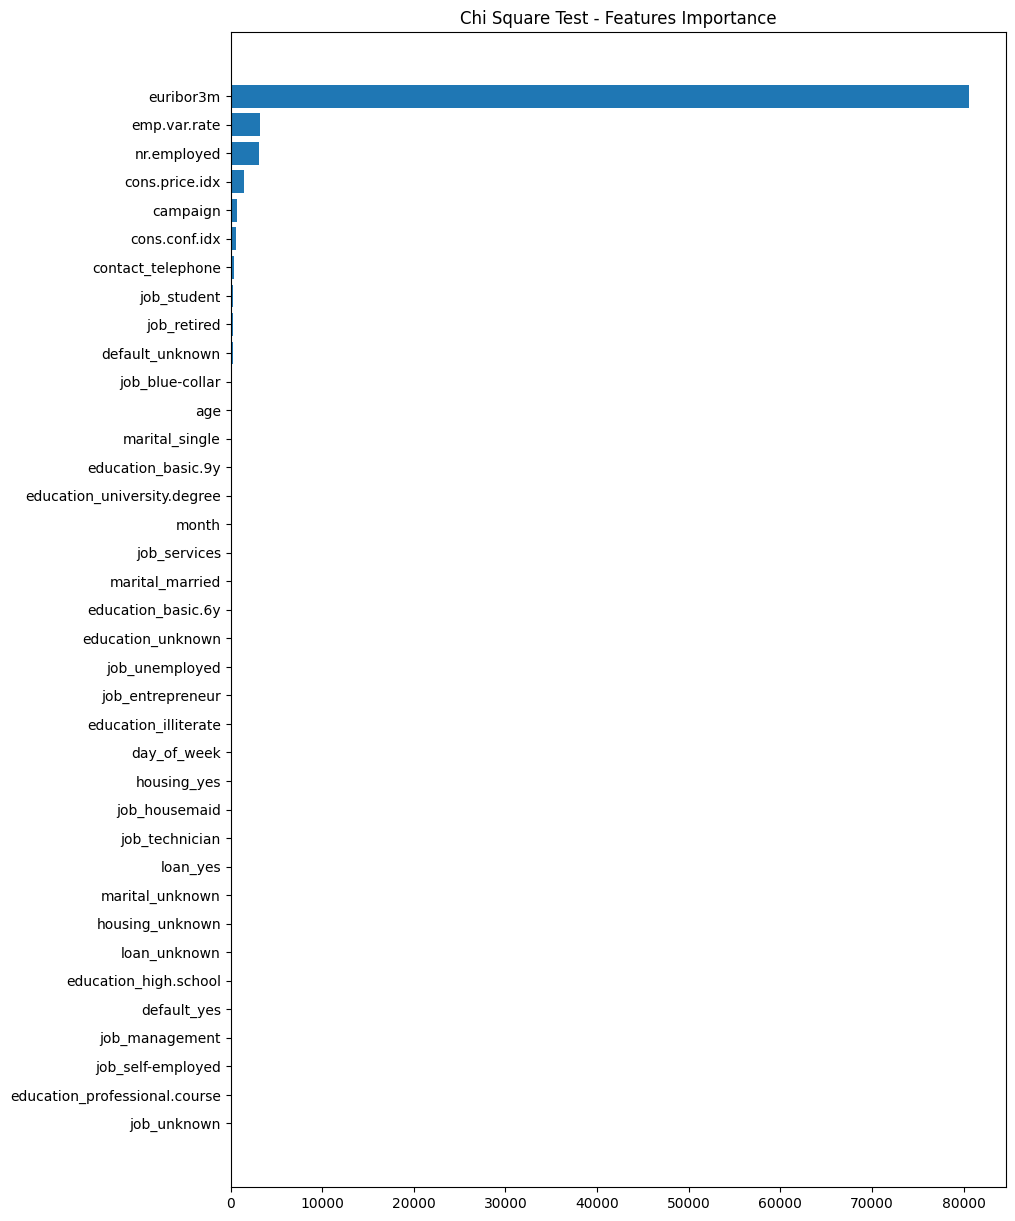

In [ ]:
# what are scores for the features
dfscore = pd.DataFrame(fs.scores_)
dfcolumn = pd.DataFrame(X.columns)
fearureScore = pd.concat([dfcolumn, dfscore], axis=1)
fearureScore.columns = ['Feature', 'Score']
fearureScore = fearureScore.sort_values(by='Score', ascending=True).reset_index()
plt.subplots(figsize=(10, 15))
plt.barh(y=fearureScore['Feature'], width=fearureScore['Score'])
plt.title('Chi Square Test - Features Importance')

### 5.2.Logistic Regression Model

In [ ]:
model = LogisticRegression()
model.fit(X_train_fs, y_train_enc)
y_pred = model.predict_proba(X_test_fs)
auc_score = roc_auc_score(y_test_enc, y_pred[:,1])
print("AUC score:", auc_score)

AUC score: 0.7556920670962355
